# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [2]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 3

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
cordinates, labels = generate_data(3000)

print(f"Data Generated: {cordinates.shape} samples.")
print(f"Target Generated: {labels.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


In [3]:
# ==============================================================================
# Code from here. Best of luckk :)
# ==============================================================================

In [4]:
cordinates

tensor([[-4.9574, -3.9443],
        [-2.1416, -4.7305],
        [-0.2839, -4.3988],
        ...,
        [ 3.2947,  0.4954],
        [-3.1256,  2.7103],
        [-0.0864, -3.3054]])

In [5]:
labels

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [0.],
        [1.]])

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing

In [7]:
#Scaling manually 

cordiantes_mean = cordinates.mean(dim=0, keepdim=True)
cordiantes_std = cordinates.std(dim=0, keepdim=True)

cordinates_scaled = (cordinates - cordiantes_mean)/cordiantes_std

In [8]:
cordinates_scaled

tensor([[-1.7345, -1.3215],
        [-0.7520, -1.5905],
        [-0.1037, -1.4770],
        ...,
        [ 1.1450,  0.1976],
        [-1.0953,  0.9555],
        [-0.0348, -1.1028]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cordinates_scaled, labels, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

In [10]:
X_train.shape

torch.Size([2400, 2])

I found this to be incorrect initialisation as the parameters stop being leaf tensors after mathematical operations and thus grad returns none. I have given the corrected implementation below

In [ ]:
# #Building MLP with given architecture

# input_dimensions = 2
# hidden_dimensions = 16
# output_dimensions = 1

# #Initialising weights

# torch.manual_seed(42)

# #Layer 1:- 4 to 16

# w1 = torch.randn(input_dimensions, hidden_dimensions, requires_grad = True, dtype = torch.float32) * 0.01      #To avoid large initialisation of weights
# b1 = torch.randn(1,hidden_dimensions, requires_grad = True, dtype = torch.float32)*0.01

# #Layer 2:- 16 to 16

# w2 = torch.randn(hidden_dimensions, hidden_dimensions, requires_grad=True, dtype = torch.float32)
# b2 = torch.randn(1,hidden_dimensions, requires_grad=True, dtype = torch.float32)

# #Layer 3:- 16 to 1

# w3 = torch.randn(hidden_dimensions, output_dimensions, requires_grad=True, dtype = torch.float32)
# b3 = torch.randn(1, output_dimensions, requires_grad=True, dtype = torch.float32)

# Manual Calibration

In [42]:
#Building MLP with given architecture

input_dimensions = 2
hidden_dimensions = 16
output_dimensions = 1

#Initialising weights

torch.manual_seed(42)

#Layer 1:- 4 to 16

w1 = torch.randn(input_dimensions, hidden_dimensions,dtype = torch.float32) * torch.sqrt(torch.tensor(2.0 / input_dimensions))     #To avoid large initialisation of weights and increase accuracy
w1.requires_grad_()

b1 = torch.randn(1,hidden_dimensions, dtype = torch.float32) * torch.sqrt(torch.tensor(2.0 / hidden_dimensions)) 
b1.requires_grad_()

#Layer 2:- 16 to 16

w2 = torch.randn(hidden_dimensions, hidden_dimensions, dtype = torch.float32) * torch.sqrt(torch.tensor(2.0 / hidden_dimensions)) 
w2.requires_grad_()

b2 = torch.randn(1,hidden_dimensions, dtype = torch.float32) * torch.sqrt(torch.tensor(2.0 / hidden_dimensions)) 
b2.requires_grad_()

#Layer 3:- 16 to 1

w3 = torch.randn(hidden_dimensions, output_dimensions, dtype = torch.float32) * torch.sqrt(torch.tensor(2.0 / output_dimensions)) 
w3.requires_grad_()

b3 = torch.randn(1, output_dimensions, dtype = torch.float32) * torch.sqrt(torch.tensor(2.0 / output_dimensions)) 
b3.requires_grad_()


tensor([[-0.8017]], requires_grad=True)

In [16]:
#Using custom loss function

def binary_cross_entropy(y_hat, y):
    eps = 1e-8  # numerical stability
    y_hat = torch.clamp(y_hat, eps, 1-eps)
    loss = -torch.mean(y*torch.log(y_hat) + (1-y)*torch.log(1-y_hat))

    return loss

# Model Architecture

In [47]:
#Training

learning_rate = 0.5  #This is what I found to give the best 0.01 resulted in a low acc of 0.75 and 0.1 resulted in overfitting
epochs = 200

train_losses = []
validation_losses = []
train_accuracy = []
validation_accuracy = []

for epoch in range(1001):

    #Forward Passing
    
    #Layer 1 using relu activation function

    z1 = torch.matmul(X_train, w1) + b1 
    a1 = torch.relu(z1)

    #Layer 2

    z2 = torch.matmul(a1, w2) + b2 
    a2 = torch.relu(z2)

    #Layer 1 using relu activation function

    z3 = torch.matmul(a2, w3) + b3
    predicted_value = torch.sigmoid(z3)

    train_loss = binary_cross_entropy(predicted_value, y_train)

    train_loss.backward()

    with torch.no_grad():

        #Adjusting weights

        for parameter in [w1,w2,w3,b1,b2,b3]:

            parameter -= learning_rate * parameter.grad
            parameter.grad.zero_()

    #Plotting metrics

    train_preds = (predicted_value > 0.5).float()
    train_acc = (train_preds == y_train).float().mean()

    #Validating

    with torch.no_grad():
        
        #Forward Passing
    
        #Layer 1 using relu activation function

        z1 = torch.matmul(X_validation, w1) + b1 
        a1 = torch.relu(z1)

        #Layer 2

        z2 = torch.matmul(a1, w2) + b2 
        a2 = torch.relu(z2)

        #Layer 1 using relu activation function

        z3 = torch.matmul(a2, w3) + b3
        validation_values = torch.sigmoid(z3)

        validation_loss = binary_cross_entropy(validation_values, y_validation)

        validation_preds = (validation_values > 0.5).float()
        validation_acc = (validation_preds == y_validation).float().mean()

        train_losses.append(train_loss.item())
        validation_losses.append(validation_loss.item())
        train_accuracy.append(train_acc.item())
        validation_accuracy.append(validation_acc.item())

        if (epoch % 20 == 0):
            print(f"Epoch {epoch}: "
                  f"Train Loss = {train_loss: .4f} \n"
                  f"Validation Loss: {validation_loss : .4f} \n"
                  f"Accuracy : {train_acc : .4f}"
            )
            print ("-"*50)
            


    



Epoch 0: Train Loss =  0.2806 
Validation Loss:  0.2513 
Accuracy :  0.9104
--------------------------------------------------
Epoch 20: Train Loss =  0.2811 
Validation Loss:  0.2518 
Accuracy :  0.9087
--------------------------------------------------
Epoch 40: Train Loss =  0.2813 
Validation Loss:  0.2521 
Accuracy :  0.9092
--------------------------------------------------
Epoch 60: Train Loss =  0.2812 
Validation Loss:  0.2524 
Accuracy :  0.9092
--------------------------------------------------
Epoch 80: Train Loss =  0.2806 
Validation Loss:  0.2522 
Accuracy :  0.9108
--------------------------------------------------
Epoch 100: Train Loss =  0.2810 
Validation Loss:  0.2528 
Accuracy :  0.9096
--------------------------------------------------
Epoch 120: Train Loss =  0.2808 
Validation Loss:  0.2529 
Accuracy :  0.9100
--------------------------------------------------
Epoch 140: Train Loss =  0.2804 
Validation Loss:  0.2525 
Accuracy :  0.9104
-------------------------

# GDC Dashboard

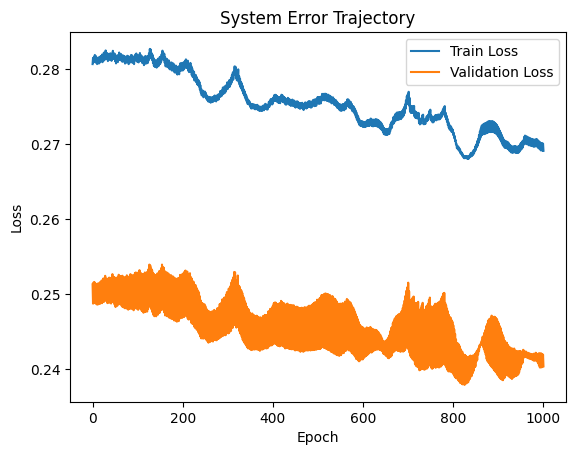

In [62]:
plt.plot(train_losses, label="Train Loss")
plt.plot(validation_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("System Error Trajectory")
plt.show()


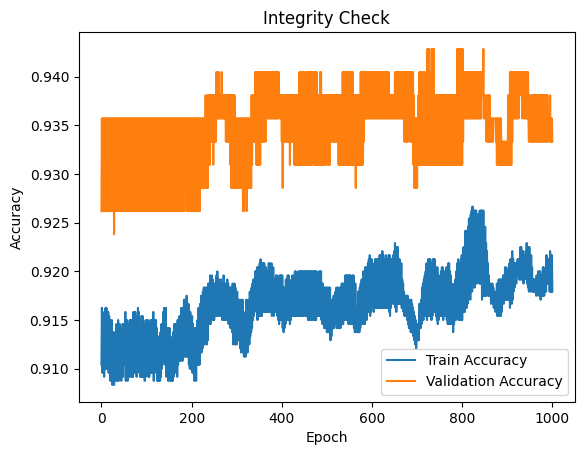

In [50]:
plt.plot(train_accuracy, label="Train Accuracy")
plt.plot(validation_accuracy, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Integrity Check")
plt.show()


The model works well enough without overfitting

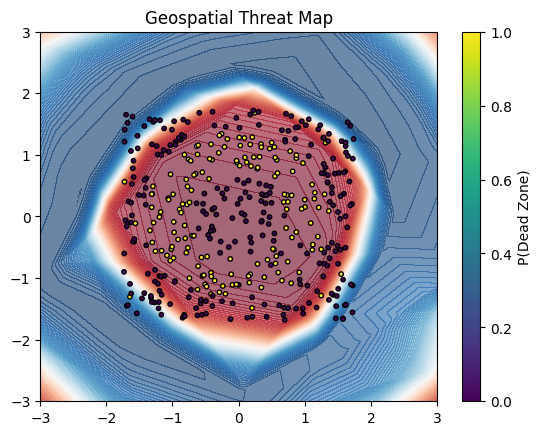

In [68]:
#Threat Map


x_cordinates, y_cordinates = torch.meshgrid(
    torch.linspace(-3, 3, 300),
    torch.linspace(-3, 3, 300),
    indexing='ij'
)

#Keeping space same as training space by scaling with original mean and std

grid = torch.stack([x_cordinates.flatten(), y_cordinates.flatten()], dim=1)
grid = (grid - cordiantes_mean) / cordiantes_std

with torch.no_grad():

    #Forward Passing
    
    #Layer 1 using relu activation function

    z1 = torch.matmul(grid, w1) + b1 
    a1 = torch.relu(z1)

    #Layer 2

    z2 = torch.matmul(a1, w2) + b2 
    a2 = torch.relu(z2)

    #Layer 1 using relu activation function

    z3 = torch.matmul(a2, w3) + b3
    probs = torch.sigmoid(z3).reshape(x_cordinates.shape)

plt.contourf(x_cordinates, y_cordinates, probs, levels=100, cmap="RdBu", alpha=0.6)
plt.scatter(X_validation[:,0], X_validation[:,1], c=y_validation.squeeze(), s=10, edgecolors='k')
plt.colorbar(label="P(Dead Zone)")
plt.title("Geospatial Threat Map")
plt.show()


Evidently the model works pretty well